In [5]:
import numpy as np 
import pandas as pd
data = np.array([[0,2,0,0], [0,1,4,0], [0,1,1,0]])
raw = pd.DataFrame({'col1': data[:,0],'col2': data[:,1],'col3': data[:,2],'col4': data[:,3]})
print(raw)
print("type of raw: ")
print(type(raw))

   col1  col2  col3  col4
0     0     2     0     0
1     0     1     4     0
2     0     1     1     0
type of raw: 
<class 'pandas.core.frame.DataFrame'>


In [8]:
# remove irrelevant features
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
# First normalize ds
normalized = preprocessing.normalize(raw)
normalized_dataset = pd.DataFrame({'col1': normalized[:,0],'col2': normalized[:,1],'col3': normalized[:,2],'col4': normalized[:,3]})
normalized_dataset


,col1,col2,col3,col4
0,0.0,1.000000,0.000000,0.0
1,0.0,0.242536,0.970143,0.0
2,0.0,0.707107,0.707107,0.0


In [9]:
selector = VarianceThreshold()
featureSelected = selector.fit_transform(normalized_dataset)
featureSelected

array([[1.        , 0.        ],
       [0.24253563, 0.9701425 ],
       [0.70710678, 0.70710678]])

### Real world example IRIS

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [12]:
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In order to apply PCA, first apply standardization

In [21]:
from sklearn.preprocessing import StandardScaler
# Separate features and target
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = ['target']
x = df.loc[:, features].values
#print(type(x))
y = df.loc[:, target].values

In [25]:
# Scale
x = StandardScaler().fit_transform(x)
xdf = pd.DataFrame({'sepal length':x[:,0], 'sepal width':x[:,1], 'petal length':x[:,2], 'petal width':x[:,3], 'target':y[:,0]})
xdf.head(4)

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa


In [29]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pcadf = pd.DataFrame(data=principalComponents, columns=['pca1', 'pca2'])
pcadf.head(4)

,pca1,pca2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368


In [32]:
# final df
finalDF = pd.concat([pcadf, df[['target']]], axis=1)
finalDF.head(4)

,pca1,pca2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa


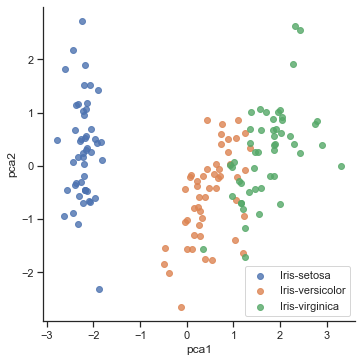

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot( x="pca1", y="pca2", data=finalDF, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')

In [39]:
# Variance ratio
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]
